# Feature agglomeration

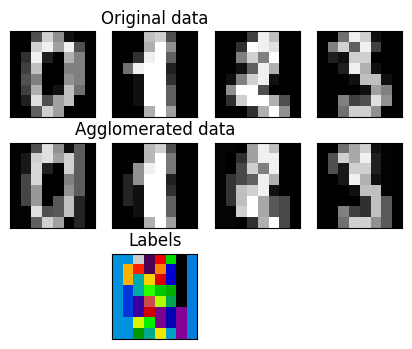

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.feature_extraction.image import grid_to_graph

digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))   # 이미지를 2차원 배열로 변환한다.
connectivity = grid_to_graph(*images[0].shape)  # 이미지의 모양을 기반으로 연결 그래프를 생성한다. 연결 그래프는 특성간의 연결을 지정한다. 연결 그래프는 특성 병합 중에 공간 정보를 보존하는 데 중요하다.

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)  # 연결 그래프와 32개의 클러스터로 구성된 특정 병합 모델을 생성한다.

agglo.fit(X)
X_reduced = agglo.transform(X)  # 학습된 특성 병합을 사용하여 데이터를 32개의 특성으로 변환한다.

X_restored = agglo.inverse_transform(X_reduced) # 감소된 표현에서 원본 데이터를 복원한다.
images_restored = np.reshape(X_restored, images.shape)  # 역변환된 데이터를 원래 이미지 형식으로 변환한다.
plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
    plt.xticks(())
    plt.yticks(())
    if i == 1:
        plt.title("Original data")
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
    if i == 1:
        plt.title("Agglomerated data")
    plt.xticks(())
    plt.yticks(())

plt.subplot(3, 4, 10)
plt.imshow(
    np.reshape(agglo.labels_, images[0].shape),
    interpolation="nearest",
    cmap=plt.cm.nipy_spectral,
)
plt.xticks(())
plt.yticks(())
plt.title("Labels")
plt.show()

- 이 이미지는 어떻게 비슷한 특징들이 feature agglomeration을 사용하여 하나로 통합되는 지 보여준다.